<a href="https://colab.research.google.com/github/hbabar1215/nhanes_inferential_2021_23/blob/main/nhanes_inferential_2021_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import chi2_contingency


In [ ]:
# Load NHANES demographic XPT file
df= pd.read_sas("/content/drive/MyDrive/DEMO_L.xpt")

In [ ]:
# Show data
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60


In [ ]:
# Question 1: "Is there an association between marital status (married or not married) and education level (bachelor’s degree or higher vs. less than a bachelor’s degree)?"#

In [ ]:
# Keep columns DMDMARTZ and DMDEDUC2
df_demo= df[["SEQN","DMDMARTZ","DMDEDUC2"]]


In [ ]:
# Drop missing data or invalid codes
df_demo1= df_demo.dropna()
df_demo1

,SEQN,DMDMARTZ,DMDEDUC2
0,130378.0,1.0,5.0
1,130379.0,1.0,5.0
2,130380.0,1.0,3.0
6,130384.0,3.0,2.0
7,130385.0,1.0,3.0
...,...,...,...
11927,142305.0,2.0,1.0
11929,142307.0,3.0,5.0
11930,142308.0,1.0,4.0
11931,142309.0,2.0,4.0


In [ ]:
# Remove values for those that did not answer (# 7 and #9)
df_demo = df_demo1[~df_demo1['DMDMARTZ'].isin([7, 9])]
df_demo

,SEQN,DMDMARTZ,DMDEDUC2
0,130378.0,1.0,5.0
1,130379.0,1.0,5.0
2,130380.0,1.0,3.0
6,130384.0,3.0,2.0
7,130385.0,1.0,3.0
...,...,...,...
11927,142305.0,2.0,1.0
11929,142307.0,3.0,5.0
11930,142308.0,1.0,4.0
11931,142309.0,2.0,4.0


In [ ]:
# Recode marital status (#1 = married)
df_demo['marital_status'] = df_demo['DMDMARTZ'].apply(lambda x: 'Married' if x == 1 else 'Not Married')

In [ ]:
# Recode education level (bachelors degree or higher vs not)
#5= bachelor's degree or higher all else is less than a bachelor’s degree
df_demo['Education Level']= df_demo['DMDEDUC2'].apply(lambda x: 'Bachelor or higher' if x==5 else 'Less than a bachelor’s degree')
df_demo


,SEQN,DMDMARTZ,DMDEDUC2,marital_status,Education Level
0,130378.0,1.0,5.0,Married,Bachelor or higher
1,130379.0,1.0,5.0,Married,Bachelor or higher
2,130380.0,1.0,3.0,Married,Less than a bachelor’s degree
6,130384.0,3.0,2.0,Not Married,Less than a bachelor’s degree
7,130385.0,1.0,3.0,Married,Less than a bachelor’s degree
...,...,...,...,...,...
11927,142305.0,2.0,1.0,Not Married,Less than a bachelor’s degree
11929,142307.0,3.0,5.0,Not Married,Bachelor or higher
11930,142308.0,1.0,4.0,Married,Less than a bachelor’s degree
11931,142309.0,2.0,4.0,Not Married,Less than a bachelor’s degree


In [ ]:
# Make a table to compare groups
table = pd.crosstab(df_demo['Education Level'], df_demo['marital_status'])
print(table)

marital_status                 Married  Not Married
Education Level                                    
Bachelor or higher                1631          994
Less than a bachelor’s degree     2505         2662


In [ ]:
# Chi-square test
chi2, p, dof, expected = chi2_contingency(table)
print("\n Chi-square:", chi2)
print("\n P-value:", p)



 Chi-square: 129.7270989847183

 P-value: 4.7017282148734955e-30


In [ ]:
# Significance of our results
if p < 0.05:
  print("There is there an association between marital status and education level")
else:
  print("There is NOT an association between marital status and education level")

There is there an association between marital status and education level


Answer: This suggests that there is an association between marital level and education level. People who are married are more likely to have a bachelor's degree or higher.

In [ ]:
# Question 2: Is there a difference in the mean sedentary behavior time between those who are married and those who are not married?

In [ ]:
# Load PAQ data
df_paq= pd.read_sas("/content/drive/MyDrive/PAQ_L.xpt")
df_paq

,SEQN,PAD790Q,PAD790U,PAD800,PAD810Q,PAD810U,PAD820,PAD680
0,130378.0,3.000000e+00,b'W',45.0,3.000000e+00,b'W',45.0,360.0
1,130379.0,4.000000e+00,b'W',45.0,3.000000e+00,b'W',45.0,480.0
2,130380.0,1.000000e+00,b'W',20.0,5.397605e-79,b'',NaN,240.0
3,130384.0,5.397605e-79,b'',NaN,5.397605e-79,b'',NaN,60.0
4,130385.0,1.000000e+00,b'D',90.0,1.000000e+00,b'W',60.0,180.0
...,...,...,...,...,...,...,...,...
8148,142305.0,2.000000e+00,b'W',40.0,5.397605e-79,b'',NaN,480.0
8149,142307.0,3.000000e+00,b'W',15.0,5.397605e-79,b'',NaN,480.0
8150,142308.0,1.000000e+00,b'W',45.0,5.397605e-79,b'',NaN,600.0
8151,142309.0,2.000000e+00,b'D',15.0,5.397605e-79,b'',NaN,240.0


In [ ]:
# Merge the demographic data and PAQ data
df_merged2= pd.merge(df_demo, df_paq, on='SEQN', how='inner')
df_merged2.head()

,SEQN,DMDMARTZ,DMDEDUC2,marital_status,Education Level,PAD790Q,PAD790U,PAD800,PAD810Q,PAD810U,PAD820,PAD680
0,130378.0,1.0,5.0,Married,Bachelor or higher,3.000000e+00,b'W',45.0,3.000000e+00,b'W',45.0,360.0
1,130379.0,1.0,5.0,Married,Bachelor or higher,4.000000e+00,b'W',45.0,3.000000e+00,b'W',45.0,480.0
2,130380.0,1.0,3.0,Married,Less than a bachelor’s degree,1.000000e+00,b'W',20.0,5.397605e-79,b'',NaN,240.0
3,130384.0,3.0,2.0,Not Married,Less than a bachelor’s degree,5.397605e-79,b'',NaN,5.397605e-79,b'',NaN,60.0
4,130385.0,1.0,3.0,Married,Less than a bachelor’s degree,1.000000e+00,b'D',90.0,1.000000e+00,b'W',60.0,180.0


In [ ]:
# Keep DMDMARTZ, PAD680, and marital status columns
df_question2= df_merged2[["SEQN","marital_status","PAD680"]]
df_question2

,SEQN,marital_status,PAD680
0,130378.0,Married,360.0
1,130379.0,Married,480.0
2,130380.0,Married,240.0
3,130384.0,Not Married,60.0
4,130385.0,Married,180.0
...,...,...,...
7787,142305.0,Not Married,480.0
7788,142307.0,Not Married,480.0
7789,142308.0,Married,600.0
7790,142309.0,Not Married,240.0


In [ ]:
# Remove missing data from married and unmarried groups (7777, 9999, and null)
df_question2 = df_question2[df_question2['PAD680'] != 7777]
df_question2 = df_question2[df_question2['PAD680'] != 9999]
df_question2 = df_question2.dropna()
df_question2

,SEQN,marital_status,PAD680
0,130378.0,Married,360.0
1,130379.0,Married,480.0
2,130380.0,Married,240.0
3,130384.0,Not Married,60.0
4,130385.0,Married,180.0
...,...,...,...
7787,142305.0,Not Married,480.0
7788,142307.0,Not Married,480.0
7789,142308.0,Married,600.0
7790,142309.0,Not Married,240.0


In [ ]:
# Mean of PAD680 in married vs unmarried groups
df_question2.groupby('marital_status')['PAD680'].mean()


,PAD680
marital_status,
Married,353.287141
Not Married,371.914428


<Axes: xlabel='marital_status'>

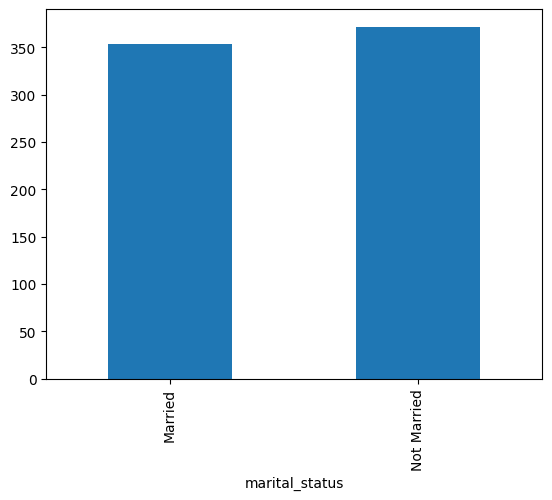

In [ ]:
# Create bar chart of mean for married group vs unmarried group
df_question2.groupby('marital_status')['PAD680'].mean().plot(kind='bar')

In [ ]:
# Complete t-test
t_stat, p_value = stats.ttest_ind(df_question2[df_question2['marital_status'] == 'Married']['PAD680'],
                                  df_question2[df_question2['marital_status'] == 'Not Married']['PAD680'],
                                  equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -3.845817664274755
P-value: 0.00012115751246120573


The mean sedentary behavior time between those who are married is lower (353.29) compared to those who are not married (371.91). These results are significant (t= -3.846, p< 0.05) which means that married individuals spend less time sitting at school, at home, getting to and from places, or with friends including time spent sitting at a desk, traveling in a car or bus, reading, playing cards, watching television, or using a computer.

In [ ]:
# Question 3: "How do age and marital status affect systolic blood pressure?"

In [ ]:
# Load Blood Pressure - Oscillometric Measurements data
df_bp= pd.read_sas("/content/drive/MyDrive/BPXO_L.xpt")
df_bp.head()

,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,130378.0,b'R',4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,79.0,82.0
1,130379.0,b'R',4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,71.0,73.0
2,130380.0,b'R',4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,83.0,77.0
3,130386.0,b'R',4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,64.0,64.0
4,130387.0,b'R',4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,80.0,77.0


In [ ]:
# Merge them using the SEQN
df_merged= pd.merge(df, df_bp, on='SEQN', how='inner')
df_merged.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,79.0,82.0
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,71.0,73.0
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,83.0,77.0
3,130386.0,12.0,2.0,1.0,34.0,NaN,1.0,1.0,1.0,NaN,...,4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,64.0,64.0
4,130387.0,12.0,2.0,2.0,68.0,NaN,3.0,3.0,2.0,NaN,...,4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,80.0,77.0


In [ ]:
# Keep RIDAGEYR (age), DMDMARTZ (marital status, recoded), and BPXOSY3 (systolic blood pressure)
df_question3= df_merged[["RIDAGEYR","DMDMARTZ", "BPXOSY3"]].copy()
df_question3

,RIDAGEYR,DMDMARTZ,BPXOSY3
0,43.0,1.0,132.0
1,66.0,1.0,113.0
2,44.0,1.0,104.0
3,34.0,1.0,115.0
4,68.0,3.0,145.0
...,...,...,...
7796,9.0,NaN,NaN
7797,49.0,3.0,131.0
7798,50.0,1.0,112.0
7799,40.0,2.0,128.0


In [ ]:
# Drop missing data
df_question3= df_question3.dropna()
df_question3

,RIDAGEYR,DMDMARTZ,BPXOSY3
0,43.0,1.0,132.0
1,66.0,1.0,113.0
2,44.0,1.0,104.0
3,34.0,1.0,115.0
4,68.0,3.0,145.0
...,...,...,...
7795,76.0,2.0,144.0
7797,49.0,3.0,131.0
7798,50.0,1.0,112.0
7799,40.0,2.0,128.0


In [ ]:
# Count DMDMARTZ
df_question3['DMDMARTZ'].value_counts()

,count
DMDMARTZ,
1.0,3186
2.0,1461
3.0,1191
99.0,3
77.0,1


In [ ]:
# Recode Married status
#1 = married
df_question3.loc[:, 'MaritalStatus'] = df_question3['DMDMARTZ'].apply(lambda x: 'Married' if x == 1 else 'Not Married')
df_question3

/tmp/ipython-input-60626259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_question3.loc[:, 'MaritalStatus'] = df_question3['DMDMARTZ'].apply(lambda x: 'Married' if x == 1 else 'Not Married')


,RIDAGEYR,DMDMARTZ,BPXOSY3,MaritalStatus
0,43.0,1.0,132.0,Married
1,66.0,1.0,113.0,Married
2,44.0,1.0,104.0,Married
3,34.0,1.0,115.0,Married
4,68.0,3.0,145.0,Not Married
...,...,...,...,...
7795,76.0,2.0,144.0,Not Married
7797,49.0,3.0,131.0,Not Married
7798,50.0,1.0,112.0,Married
7799,40.0,2.0,128.0,Not Married


In [ ]:
# Count the number of married people
df_question3['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,3186
Not Married,2656


In [ ]:
# BP difference between married and not married people
df_question3.groupby('MaritalStatus')['BPXOSY3'].mean()

,BPXOSY3
MaritalStatus,
Married,122.609856
Not Married,122.853163


In [ ]:
# Remove missing values from married and not married people
married_bp = df_question3[df_question3['MaritalStatus'] == 'Married']['BPXOSY3'].dropna()
not_married_bp = df_question3[df_question3['MaritalStatus'] == 'Not Married']['BPXOSY3'].dropna()

In [ ]:
# t-test
t_stat, p_value = stats.ttest_ind(married_bp, not_married_bp, equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.5022422145747133
P-value: 0.6155170094496523


The married individuals had a mean systolic blood pressure of 122.61 while unmarried had a mean systolic blood pressure of 122.85. The results indicated no statistically significant difference between the two groups,
(t = –0.50, p = 0.616). This shows us that marital status does not effect systolic blood pressure.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

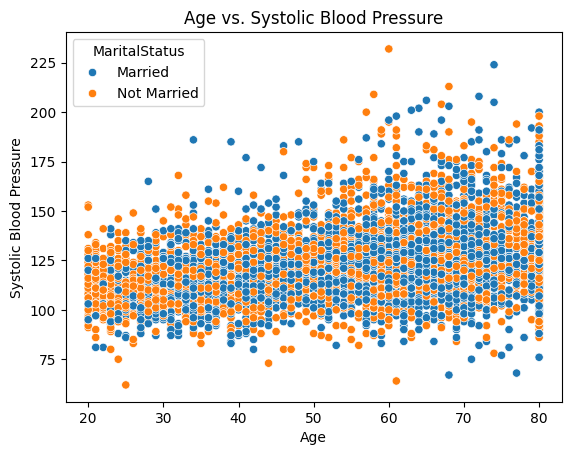

In [ ]:
# Create a scatterplot for Age vs Systolic Blood Pressure
sns.scatterplot(data=df_question3, x='RIDAGEYR', y='BPXOSY3', hue='MaritalStatus')
plt.title('Age vs. Systolic Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt

In [ ]:
# Association between age and marital status on blood pressure
corr, p_value = stats.pearsonr(df_question3['RIDAGEYR'], df_question3['BPXOSY3'])
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.3650966717156563
P-value: 1.0944068392432707e-183


A Pearson correlation showed a positive correlation between age and systolic blood pressure (r = 0.365, p < 0.001). This tells us that as age increases, systolic blood pressure increases.

In [ ]:
# Question 4: Is there a correlation between self-reported weight and minutes of sedentary behavior?

In [ ]:
# Load WHQ data for self-reported weight data WHD020
df_whq= pd.read_sas("/content/WHQ_L.xpt")
df_whq

,SEQN,WHD010,WHD020,WHD050,WHQ070
0,130378.0,71.0,190.0,200.0,1.0
1,130379.0,70.0,220.0,220.0,2.0
2,130380.0,60.0,150.0,165.0,1.0
3,130384.0,68.0,204.0,212.0,1.0
4,130385.0,70.0,240.0,240.0,2.0
...,...,...,...,...,...
8496,142305.0,61.0,137.0,134.0,2.0
8497,142307.0,61.0,206.0,235.0,1.0
8498,142308.0,69.0,174.0,180.0,1.0
8499,142309.0,69.0,200.0,170.0,2.0


In [ ]:
# Combine PAQ and WHQ data
df_merged4= pd.merge(df_paq, df_whq, on='SEQN', how='inner')
df_merged4

,SEQN,PAD790Q,PAD790U,PAD800,PAD810Q,PAD810U,PAD820,PAD680,WHD010,WHD020,WHD050,WHQ070
0,130378.0,3.000000e+00,b'W',45.0,3.000000e+00,b'W',45.0,360.0,71.0,190.0,200.0,1.0
1,130379.0,4.000000e+00,b'W',45.0,3.000000e+00,b'W',45.0,480.0,70.0,220.0,220.0,2.0
2,130380.0,1.000000e+00,b'W',20.0,5.397605e-79,b'',NaN,240.0,60.0,150.0,165.0,1.0
3,130384.0,5.397605e-79,b'',NaN,5.397605e-79,b'',NaN,60.0,68.0,204.0,212.0,1.0
4,130385.0,1.000000e+00,b'D',90.0,1.000000e+00,b'W',60.0,180.0,70.0,240.0,240.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8148,142305.0,2.000000e+00,b'W',40.0,5.397605e-79,b'',NaN,480.0,61.0,137.0,134.0,2.0
8149,142307.0,3.000000e+00,b'W',15.0,5.397605e-79,b'',NaN,480.0,61.0,206.0,235.0,1.0
8150,142308.0,1.000000e+00,b'W',45.0,5.397605e-79,b'',NaN,600.0,69.0,174.0,180.0,1.0
8151,142309.0,2.000000e+00,b'D',15.0,5.397605e-79,b'',NaN,240.0,69.0,200.0,170.0,2.0


In [ ]:
# Keep columns PAD680 and WHD020
df_question4= df_merged4[["PAD680","WHD020"]].copy()
df_question4

,PAD680,WHD020
0,360.0,190.0
1,480.0,220.0
2,240.0,150.0
3,60.0,204.0
4,180.0,240.0
...,...,...
8148,480.0,137.0
8149,480.0,206.0
8150,600.0,174.0
8151,240.0,200.0


In [ ]:
# Replace invalid values with NaN
df_question4['WHD020'] = df_question4['WHD020'].replace([7777, 9999], pd.NA)
df_question4['PAD680']= df_question4['PAD680'].replace([7777, 9999], pd.NA)
df_question4

,PAD680,WHD020
0,360.0,190.0
1,480.0,220.0
2,240.0,150.0
3,60.0,204.0
4,180.0,240.0
...,...,...
8148,480.0,137.0
8149,480.0,206.0
8150,600.0,174.0
8151,240.0,200.0


In [ ]:
# Drop missing data
df_clean4= df_question4.dropna()
df_clean4

,PAD680,WHD020
0,360.0,190.0
1,480.0,220.0
2,240.0,150.0
3,60.0,204.0
4,180.0,240.0
...,...,...
8148,480.0,137.0
8149,480.0,206.0
8150,600.0,174.0
8151,240.0,200.0


In [ ]:
print(df_clean4['PAD680'].dtype)
print(df_clean4['WHD020'].dtype)

object
object


In [ ]:
# Convert objects to numeric columns for analysis
df_clean4['WHD020'] = pd.to_numeric(df_clean4['WHD020'], errors='coerce')
df_clean4['PAD680'] = pd.to_numeric(df_clean4['PAD680'], errors='coerce')

/tmp/ipython-input-2121827504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean4['WHD020'] = pd.to_numeric(df_clean4['WHD020'], errors='coerce')
/tmp/ipython-input-2121827504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean4['PAD680'] = pd.to_numeric(df_clean4['PAD680'], errors='coerce')


In [ ]:
from scipy.stats import pearsonr
import numpy as np


In [ ]:
# Complete correlation test
corr, p_value = stats.pearsonr(df_clean4['PAD680'], df_clean4['WHD020'])
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.1559714584645022
P-value: 1.6988498386823033e-44


There is a small but statistically significant correlation between self-reported weight and minutes of sedentary behavior as the Pearson correlation coefficient is 0.1560.

In [ ]:
# Question 5: Do married women report greater feelings of tiredness or having little energy than unmarried women?

In [ ]:
# Load DPQ
df_dpq= pd.read_sas("/content/DPQ_L.xpt")
df_dpq

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,130378.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130379.0,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
2,130380.0,5.397605e-79,5.397605e-79,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
3,130386.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,130387.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6332,142305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6333,142307.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
6334,142308.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
6335,142309.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN


In [ ]:
# Merge DPQ and demo data
df_merged5 = pd.merge(df, df_dpq, on='SEQN', how='inner')
df_merged5

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,5.397605e-79,5.397605e-79,1.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
3,130386.0,12.0,2.0,1.0,34.0,NaN,1.0,1.0,1.0,NaN,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79
4,130387.0,12.0,2.0,2.0,68.0,NaN,3.0,3.0,2.0,NaN,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6332,142305.0,12.0,2.0,2.0,76.0,NaN,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6333,142307.0,12.0,2.0,2.0,49.0,NaN,4.0,4.0,2.0,NaN,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
6334,142308.0,12.0,2.0,1.0,50.0,NaN,2.0,2.0,1.0,NaN,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
6335,142309.0,12.0,2.0,1.0,40.0,NaN,2.0,2.0,1.0,NaN,...,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN


In [ ]:
# Keep columns RIAGENDR, DPQ040, DMDMARTZ
df_question5 = df_merged5[["SEQN", "RIAGENDR", "DPQ040", "DMDMARTZ"]].copy()
df_question5

,SEQN,RIAGENDR,DPQ040,DMDMARTZ
0,130378.0,1.0,NaN,1.0
1,130379.0,1.0,5.397605e-79,1.0
2,130380.0,2.0,1.000000e+00,1.0
3,130386.0,1.0,5.397605e-79,1.0
4,130387.0,2.0,5.397605e-79,3.0
...,...,...,...,...
6332,142305.0,2.0,NaN,2.0
6333,142307.0,2.0,5.397605e-79,3.0
6334,142308.0,1.0,5.397605e-79,1.0
6335,142309.0,1.0,5.397605e-79,2.0


In [ ]:

# Recode marital status: 1 = Married, all else = Not Married
df_question5['marital_status'] = df_question5['DMDMARTZ'].apply(lambda x: 'Married' if x==1 else ('Not Married' if x in [2,3] else pd.NA))
df_question5

,SEQN,RIAGENDR,DPQ040,DMDMARTZ,marital_status
0,130378.0,1.0,NaN,1.0,Married
1,130379.0,1.0,5.397605e-79,1.0,Married
2,130380.0,2.0,1.000000e+00,1.0,Married
3,130386.0,1.0,5.397605e-79,1.0,Married
4,130387.0,2.0,5.397605e-79,3.0,Not Married
...,...,...,...,...,...
6332,142305.0,2.0,NaN,2.0,Not Married
6333,142307.0,2.0,5.397605e-79,3.0,Not Married
6334,142308.0,1.0,5.397605e-79,1.0,Married
6335,142309.0,1.0,5.397605e-79,2.0,Not Married


In [ ]:
# Keep the columns needed
df_question5 = df_question5[['SEQN', 'DPQ040', 'RIAGENDR', 'marital_status']]
df_question5

,SEQN,DPQ040,RIAGENDR,marital_status
0,130378.0,NaN,1.0,Married
1,130379.0,5.397605e-79,1.0,Married
2,130380.0,1.000000e+00,2.0,Married
3,130386.0,5.397605e-79,1.0,Married
4,130387.0,5.397605e-79,2.0,Not Married
...,...,...,...,...
6332,142305.0,NaN,2.0,Not Married
6333,142307.0,5.397605e-79,2.0,Not Married
6334,142308.0,5.397605e-79,1.0,Married
6335,142309.0,5.397605e-79,1.0,Not Married


In [ ]:
# Convert to numeric (just in case)
df_question5['DPQ040'] = pd.to_numeric(df_question5['DPQ040'], errors='coerce')
df_question5

/tmp/ipython-input-146388789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_question5['DPQ040'] = pd.to_numeric(df_question5['DPQ040'], errors='coerce')


,SEQN,DPQ040,RIAGENDR,marital_status
0,130378.0,NaN,1.0,Married
1,130379.0,5.397605e-79,1.0,Married
2,130380.0,1.000000e+00,2.0,Married
3,130386.0,5.397605e-79,1.0,Married
4,130387.0,5.397605e-79,2.0,Not Married
...,...,...,...,...
6332,142305.0,NaN,2.0,Not Married
6333,142307.0,5.397605e-79,2.0,Not Married
6334,142308.0,5.397605e-79,1.0,Married
6335,142309.0,5.397605e-79,1.0,Not Married


In [ ]:
# Create a copy
df_question5 = df_question5.copy()
df_question5

,SEQN,DPQ040,RIAGENDR,marital_status
0,130378.0,NaN,1.0,Married
1,130379.0,5.397605e-79,1.0,Married
2,130380.0,1.000000e+00,2.0,Married
3,130386.0,5.397605e-79,1.0,Married
4,130387.0,5.397605e-79,2.0,Not Married
...,...,...,...,...
6332,142305.0,NaN,2.0,Not Married
6333,142307.0,5.397605e-79,2.0,Not Married
6334,142308.0,5.397605e-79,1.0,Married
6335,142309.0,5.397605e-79,1.0,Not Married


In [ ]:
# Replace invalid values with NaN
df_question5['DPQ040'] = df_question5['DPQ040'].replace([7, 9], pd.NA)
df_question5

,SEQN,DPQ040,RIAGENDR,marital_status
0,130378.0,NaN,1.0,Married
1,130379.0,0.0,1.0,Married
2,130380.0,1.0,2.0,Married
3,130386.0,0.0,1.0,Married
4,130387.0,0.0,2.0,Not Married
...,...,...,...,...
6332,142305.0,NaN,2.0,Not Married
6333,142307.0,0.0,2.0,Not Married
6334,142308.0,0.0,1.0,Married
6335,142309.0,0.0,1.0,Not Married


In [ ]:
# Drop rows with missing DPQ040 or marital_status
df_clean5 = df_question5.dropna(subset=['DPQ040', 'marital_status'])
df_clean5

,SEQN,DPQ040,RIAGENDR,marital_status
1,130379.0,0.0,1.0,Married
2,130380.0,1.0,2.0,Married
3,130386.0,0.0,1.0,Married
4,130387.0,0.0,2.0,Not Married
6,130389.0,0.0,1.0,Married
...,...,...,...,...
6331,142303.0,0.0,2.0,Not Married
6333,142307.0,0.0,2.0,Not Married
6334,142308.0,0.0,1.0,Married
6335,142309.0,0.0,1.0,Not Married


In [ ]:
# Check row count and unique values
print(df_clean5['DPQ040'].value_counts())
print(df_clean5['DPQ040'].unique())


DPQ040
0.0    2257
1.0    2023
2.0     529
3.0     447
Name: count, dtype: int64
[5.397605346934028e-79 1.0 3.0 2.0]


In [ ]:
# Keep only women in our dataframe (women = #2)
dfnew5= df_clean5[df_clean5['RIAGENDR'] == 2]
dfnew5

,SEQN,DPQ040,RIAGENDR,marital_status
2,130380.0,1.0,2.0,Married
4,130387.0,0.0,2.0,Not Married
8,130391.0,3.0,2.0,Not Married
9,130392.0,1.0,2.0,Married
12,130395.0,3.0,2.0,Not Married
...,...,...,...,...
6328,142300.0,1.0,2.0,Married
6329,142301.0,1.0,2.0,Not Married
6331,142303.0,0.0,2.0,Not Married
6333,142307.0,0.0,2.0,Not Married


In [ ]:
dfnew5['marital_status'].value_counts()

,count
marital_status,
Married,1455
Not Married,1416


In [ ]:
# Difference between tiredness question in the two groups of women
married_women =dfnew5[dfnew5['marital_status']== 'Married']['DPQ040']
unmarried_women =dfnew5[dfnew5['marital_status']== 'Not Married']['DPQ040']

In [ ]:
# Find the mean of their DPQ040 scores
mean_marriedwomen = married_women.mean()
mean_unmarried = unmarried_women.mean()

In [ ]:
# Print mean scores
print("Mean DPQ040 score for married women:", mean_marriedwomen)
print("Mean DPQ040 score for unmarried women:", mean_unmarried)

Mean DPQ040 score for married women: 0.8591065292096219
Mean DPQ040 score for unmarried women: 1.0614406779661016


<Axes: xlabel='marital_status'>

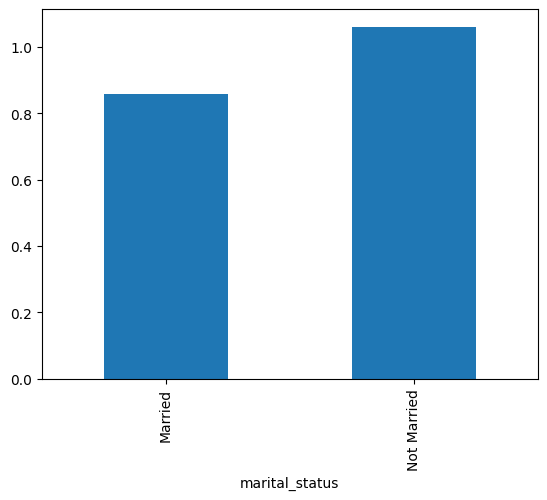

In [ ]:
# Bar chart of the mean DPQ040 scores
dfnew5.groupby('marital_status')['DPQ040'].mean().plot(kind='bar')

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
# Make sure DPQ040 is numeric value
dfnew5['DPQ040'] = pd.to_numeric(dfnew5['DPQ040'], errors='coerce')

/tmp/ipython-input-3149356074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew5['DPQ040'] = pd.to_numeric(dfnew5['DPQ040'], errors='coerce')


In [ ]:
# Complete t-test
t_stat, p_value = stats.ttest_ind(dfnew5[dfnew5['marital_status'] == 'Married']['DPQ040'],
                                  dfnew5[dfnew5['marital_status'] == 'Not Married']['DPQ040'],
                                  equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -5.710844855986374
P-value: 1.2404251685604601e-08


An independent samples t-test showed a significant difference between the two groups (t = –5.711, p < 0.001).
Married women reported lower tiredness compared to unmarried women in this sample.
